## Week 12 and 13 Assignment - DATASCI200 Introduction to Data Science Programming, UC Berkeley MIDS

Write code in this Jupyter Notebook to solve the following problems. Please upload this **Notebook** with your solutions to your GitHub repository and provide a link in the last question in gradescope. 

Assignment due date: 11:59PM PT the night before the Week 13 Live Session. Do **NOT** push/upload the data fil

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say for example **1a answer here:** to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)
- This homework assignment is not autograded because of the variety of responses one could give. 
  - Please upload this notebook to the autograder page and the TAs will manually grade it. 
  - Ensure that each cell is run and outputs your answer for ease of grading! 
  - Highly suggest to do a `restart & run all` before uploading your code to ensure everything runs and outputs correctly.
  - Answers without code (or code that runs) will be given 0 points.
- **This is meant to simulate real world data so you will have to do some external research to determine what some of the answers are!** 
- Only use the plotting libraries matplotlib or seaborn for the visualizations.

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1ftdw7L9Z6WQJ6i0SXj030PA7ObsXfPsg/view?usp=sharing. You should download and save this file in a folder outside where this notebook is stored. This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

This file is already cleaned and ready to use - you **do not** need to filter or clean it anymore! (you may not agree with the how it was cleaned but please use this file as is).

**DO NOT PUSH THIS FILE TO YOUR GITHUB REPO!**

- Best practice is to not have DATA files in your code repo. As shown below, the default load is outside of the folder this notebook is in. If you change the folder where the file is stored please update the first cell!
- If you do accidentally push the file to your github repo - follow the directions here to fix it: https://docs.google.com/document/d/15Irgb5V5G7pKPWgAerH7FPMpKeQRunbNflaW-hR2hTA/edit?usp=sharing

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## Setup

Run the cell below as it will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Load the data
# We have this defaulted to the folder OUTSIDE of your repo - please change it as needed
contrib = pd.read_csv('2016_ca_primary_cleaned.csv', index_col=False, parse_dates=['contb_receipt_dt'])

# Note - for now, it is okay to ignore the warning about mixed types.

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3433: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 1. Plotting Data (30 points)

Your boss asked for you to make a few charts from the dataset to better explore the information. 

**1a.** Plotting a histogram of contribute amount (10 points)

Make a histogram of the **full range** of values in the `contb_receipt_amt` variable. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

Based on the histogram - what range of contributions have the highest count frequency?

Text(0, 0.5, 'Number of Contributions')

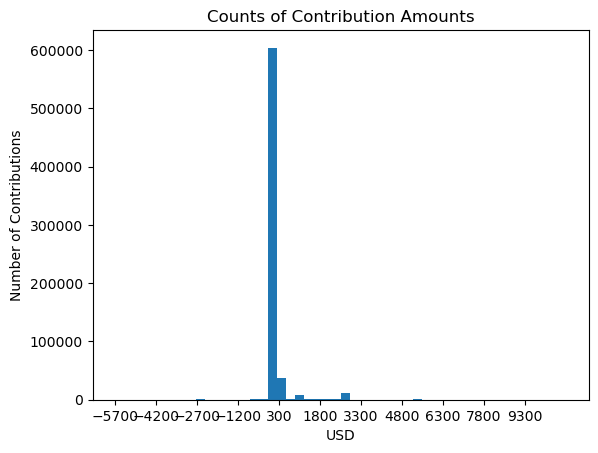

In [2]:
# 1a YOUR CODE HERE
plt.hist(contrib["contb_receipt_amt"],bins=50)
plt.xticks(np.arange(min(contrib["contb_receipt_amt"]), max(contrib["contb_receipt_amt"]), 1500))
plt.title('Counts of Contribution Amounts')
plt.xlabel('USD')
plt.ylabel('Number of Contributions')

- **1a answer here:** 
Based on the histogram the 0-$300 range has the most donations.

**1b.** Plotting a histogram of contribute amount (10 points)

Make a 'zoomed-in' histogram of the range that had the highest count frequencies from 1a above. 

Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values

What are some insights that you can see from these two histograms (1a and 1b)?

Text(0, 0.5, 'Number of Contributions')

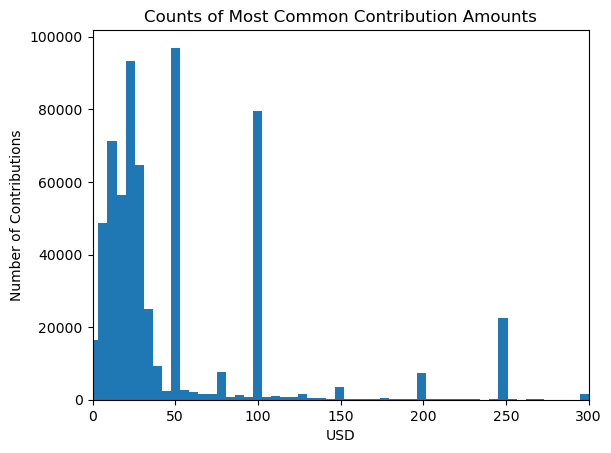

In [3]:
# 1b YOUR CODE HERE
plt.hist(contrib['contb_receipt_amt'],bins=3000)
plt.xlim(left = 0)
plt.xlim(right = 300)
plt.title('Counts of Most Common Contribution Amounts')
plt.xlabel('USD')
plt.ylabel('Number of Contributions')

- **1b answer here:** 
On the first plot it looked like there was a single spike in the 0-300 range. It was hard to get a better
resolution on that plot because there were so many entries. However, it did allow us to focus on a region
of the graph that was interesting. Once we zoomed in, we could see there were actually several spikes at
what looks like: 10, 25, 50, and 100 dollar values. There is a nice curve around 50 as the most common donation.
There is another peak at 250 dollars also, but much smaller.

**1c.** Present a time-series line chart with the following elements (10 points)  

- The chart needs to have two lines - one for Bernie Sanders and one for Hillary Clinton.
- Show the date on the x-axis
- Add vertical lines for these dates of the primary debates: 17 Jan 2016, 11 Feb 2016, 9 Mar 2016
- Show the total contribution amount for that day on the y-axis
- Include a title
- Include axis labels

How did the debates effect fundraising / donations? Did fundraising increase or decrease after the debates for each candidate?

In [21]:
# 1c YOUR CODE HERE
from matplotlib.pyplot import figure
import datetime as dt

clinton = contrib[(contrib['cand_nm']=='Clinton, Hillary Rodham') & (contrib['contb_receipt_amt'] > 0)]
clinton = clinton[['contb_receipt_amt','contb_receipt_dt']]
clinton = clinton.sort_values(by='contb_receipt_dt')
clinton = clinton.groupby('contb_receipt_dt')['contb_receipt_amt'].sum().reset_index(name='total')
c_days = clinton[(clinton['contb_receipt_dt'] == '2016-01-17') | (clinton['contb_receipt_dt'] == '2016-02-11') | (clinton['contb_receipt_dt'] == '2016-03-09')].reset_index()

sanders = contrib[(contrib['cand_nm']=='Sanders, Bernard') & (contrib['contb_receipt_amt'] > 0)]
sanders = sanders[['contb_receipt_amt','contb_receipt_dt']]
sanders = sanders.sort_values(by='contb_receipt_dt')
sanders = sanders.groupby('contb_receipt_dt')['contb_receipt_amt'].sum().reset_index(name='total')
s_days = sanders[(sanders['contb_receipt_dt'] == '2016-01-17') | (sanders['contb_receipt_dt'] == '2016-02-11') | (sanders['contb_receipt_dt'] == '2016-03-09')].reset_index()

figure(figsize=(16,9))
plt.plot(clinton['contb_receipt_dt'], clinton['total'], color = '#CA8135', label = 'Clinton')
plt.plot(sanders['contb_receipt_dt'], sanders['total'], color = '#357ECA', label = 'Sanders')

plt.axvline(dt.datetime(2016, 1, 17), color = '#DA6025', alpha = .75, lw = 1, label = 'Jan 17 Debate')
plt.axvline(dt.datetime(2016, 2, 11), color = '#DABB25', alpha = .75, lw = 1, label = 'Feb 11 Debate')
plt.axvline(dt.datetime(2016, 3, 9), color = '#DA2544', alpha = .75, lw = 1, label = 'Mar 9 Debate')

plt.axhline(y = c_days['total'][0], color = '#CA8135', xmin = 0, xmax = .015, linestyle = '--',label = 'Clinton Jan 17')
plt.axhline(y = c_days['total'][1], color = '#CA8135', xmin = 0, xmax = .015, linestyle = '-.',label = 'Clinton Feb 11')
plt.axhline(y = c_days['total'][2], color = '#CA8135', xmin = 0, xmax = .015, linestyle = ':',label = 'Clinton Mar 9')

plt.axhline(y = s_days['total'][0], color = '#357ECA', xmin = 0, xmax = .015, linestyle = '--',label = 'Sanders Jan 17')
plt.axhline(y = s_days['total'][1], color = '#357ECA', xmin = 0, xmax = .015, linestyle = '-.',label = 'Sanders Feb 11')
plt.axhline(y = s_days['total'][2], color = '#357ECA', xmin = 0, xmax = .015, linestyle = ':',label = 'Sanders Mar 9')

plt.legend()
plt.title('Total Funding by Date')
plt.xlabel('Date')
plt.ylabel('Daily Contributions in USD')

Text(0, 0.5, 'Daily Contributions in USD')

- **1c answer here:** 
Both candidates saw increases in funding after debates. Sanders had the biggest spikes on debate days, while Clinton's peaks came
several days after the debates. Fundrasing increased overall for both candidates after debates.

## 2. Exploring Campaign Contributions (35 points)

Let's investigate the donations to the candidates. (5 points)

**2a.** Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method. Groupby is explained in Unit 13: async 13.3 & 13.5
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top.

Which candidate received the largest number/count of contributions (variable 'contb_receipt_amt')?

In [2]:
# 2a YOUR CODE HERE
hist = contrib.groupby('cand_nm')['contb_receipt_amt'].size().reset_index(name='number of contributions')
hist = hist.sort_values(by='number of contributions', ascending=False)
hist

cand_nm  number of contributions
18           Sanders, Bernard                   379284
3     Clinton, Hillary Rodham                   171104
4   Cruz, Rafael Edward 'Ted'                    56355
1         Carson, Benjamin S.                    27015
17               Rubio, Marco                    13267
5              Fiorina, Carly                     4679
15                 Paul, Rand                     4164
21           Trump, Donald J.                     3806
0                   Bush, Jeb                     3056
11            Kasich, John R.                     2957
22              Walker, Scott                      666
8              Huckabee, Mike                      531
13    O'Malley, Martin Joseph                      392
12           Lessig, Lawrence                      353
2    Christie, Christopher J.                      333
7          Graham, Lindsey O.                      305
20                Stein, Jill                      180
23      Webb, James Henry Jr.                      106
16     Perry, James R. (Rick)                      104
19       Santorum, Richard J.                       85
10              Johnson, Gary                       68
9               Jindal, Bobby                       31
14          Pataki, George E.                       20
6        Gilmore, James S III                        3

- **2a answer here:** 
Sanders recieved the most number of donations, with 379284 total.

**2b.** Now, present a table that shows the total value of donations to each candidate sorted by total value of the donations. (5 points)

Which candidate raised the most money in California?

In [13]:
# 2b YOUR CODE HERE
dollars = contrib.groupby('cand_nm')['contb_receipt_amt'].sum().reset_index(name='total USD')
dollars = dollars.sort_values(by='total USD',ascending=False)
print(dollars)

                      cand_nm     total USD
3     Clinton, Hillary Rodham 38,969,122.68
18           Sanders, Bernard 19,062,998.80
4   Cruz, Rafael Edward 'Ted'  5,926,568.27
17               Rubio, Marco  4,998,700.92
0                   Bush, Jeb  3,316,836.83
1         Carson, Benjamin S.  3,022,105.15
5              Fiorina, Carly  1,473,989.42
11            Kasich, John R.  1,471,417.54
21           Trump, Donald J.    868,672.16
15                 Paul, Rand    721,563.14
22              Walker, Scott    492,706.90
2    Christie, Christopher J.    456,066.00
7          Graham, Lindsey O.    379,495.00
13    O'Malley, Martin Joseph    297,334.26
8              Huckabee, Mike    230,890.60
16     Perry, James R. (Rick)    208,400.00
12           Lessig, Lawrence    148,032.52
23      Webb, James Henry Jr.     76,568.16
19       Santorum, Richard J.     36,329.88
10              Johnson, Gary     31,787.80
14          Pataki, George E.     30,450.00
20                Stein, Jill   

- **2b answer here:** 
Clinton raised the most money, with a whopping 38,969,122.68

**2c.** Combine the tables (sorted by either a or b above). (5 points)

- Looking at the two tables you presented above - if those tables are Series convert them to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

In [14]:
# 2c YOUR CODE HERE
data = hist.merge(dollars, on='cand_nm')
data

cand_nm  number of contributions     total USD
0            Sanders, Bernard                   379284 19,062,998.80
1     Clinton, Hillary Rodham                   171104 38,969,122.68
2   Cruz, Rafael Edward 'Ted'                    56355  5,926,568.27
3         Carson, Benjamin S.                    27015  3,022,105.15
4                Rubio, Marco                    13267  4,998,700.92
5              Fiorina, Carly                     4679  1,473,989.42
6                  Paul, Rand                     4164    721,563.14
7            Trump, Donald J.                     3806    868,672.16
8                   Bush, Jeb                     3056  3,316,836.83
9             Kasich, John R.                     2957  1,471,417.54
10              Walker, Scott                      666    492,706.90
11             Huckabee, Mike                      531    230,890.60
12    O'Malley, Martin Joseph                      392    297,334.26
13           Lessig, Lawrence                      353    148,032.52
14   Christie, Christopher J.                      333    456,066.00
15         Graham, Lindsey O.                      305    379,495.00
16                Stein, Jill                      180     25,841.00
17      Webb, James Henry Jr.                      106     76,568.16
18     Perry, James R. (Rick)                      104    208,400.00
19       Santorum, Richard J.                       85     36,329.88
20              Johnson, Gary                       68     31,787.80
21              Jindal, Bobby                       31     23,231.26
22          Pataki, George E.                       20     30,450.00
23       Gilmore, James S III                        3      8,100.00

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation** (5 points)

Which candidate had the highest average donation?

In [15]:
# 2d YOUR CODE HERE
data["value per donation"] = data["total USD"].div(data["number of contributions"].values)
data = data.sort_values(by='value per donation',ascending=False)
#data = data.drop([0])
data

cand_nm  number of contributions     total USD  \
23       Gilmore, James S III                        3      8,100.00   
18     Perry, James R. (Rick)                      104    208,400.00   
22          Pataki, George E.                       20     30,450.00   
14   Christie, Christopher J.                      333    456,066.00   
15         Graham, Lindsey O.                      305    379,495.00   
8                   Bush, Jeb                     3056  3,316,836.83   
12    O'Malley, Martin Joseph                      392    297,334.26   
21              Jindal, Bobby                       31     23,231.26   
10              Walker, Scott                      666    492,706.90   
17      Webb, James Henry Jr.                      106     76,568.16   
9             Kasich, John R.                     2957  1,471,417.54   
20              Johnson, Gary                       68     31,787.80   
11             Huckabee, Mike                      531    230,890.60   
19       Santorum, Richard J.                       85     36,329.88   
13           Lessig, Lawrence                      353    148,032.52   
4                Rubio, Marco                    13267  4,998,700.92   
5              Fiorina, Carly                     4679  1,473,989.42   
7            Trump, Donald J.                     3806    868,672.16   
1     Clinton, Hillary Rodham                   171104 38,969,122.68   
6                  Paul, Rand                     4164    721,563.14   
16                Stein, Jill                      180     25,841.00   
3         Carson, Benjamin S.                    27015  3,022,105.15   
2   Cruz, Rafael Edward 'Ted'                    56355  5,926,568.27   
0            Sanders, Bernard                   379284 19,062,998.80   

    value per donation  
23            2,700.00  
18            2,003.85  
22            1,522.50  
14            1,369.57  
15            1,244.25  
8             1,085.35  
12              758.51  
21              749.40  
10              739.80  
17              722.34  
9               497.60  
20              467.47  
11              434.82  
19              427.41  
13              419.36  
4               376.78  
5               315.02  
7               228.24  
1               227.75  
6               173.29  
16              143.56  
3               111.87  
2               105.16  
0                50.26

- **2d answer here:** 
Gilmore, James S III

**2e. Plotting a Bar Chart** (10 points)

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Sort by total value of the donations
- Make the y-axis a log-scale to show both numbers! (matplotlib docs: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html )

In [20]:
# 2e YOUR CODE HERE
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

costs = data.drop('number of contributions', axis=1)
costs = costs.sort_values(by='total USD',ascending=False)
costs.set_index('cand_nm').plot.bar(rot = 90)
plt.yscale('log')

plt.legend()
plt.title('Funding by Candidate')
plt.xlabel('Candidate')
plt.ylabel('USD in log Scale')

#plt.show()



Text(0, 0.5, 'USD in log Scale')

**2f. Comment on the results of your data analysis in a short paragraph.** (5 points)

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

- **2f answer here:** 
Two of the biggest Democratic candidates had the most total donations, which is unsurprising for CA.
It is surprising to see that Sanders raised such a large total dollar value when seeing that his average donation amount is the least.


## 3. Exploring Donor Occupations (35 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a.** Show the top 5 occupations of individuals that contributed to Hillary Clinton. (5 points)

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [2]:
# 3a YOUR CODE HERE
clinton = contrib[contrib['cand_nm']=='Clinton, Hillary Rodham']
c1 = clinton['contbr_occupation'].value_counts().head()
c1

RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64

**3b.** Write a function called `get_donors`. (5 points)
 
Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [34]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    result = df['contbr_occupation'].value_counts().head()
    return(result)
   
    # 3b YOUR CODE HERE
    

**3c.** Now run the `get_donors` function from 3b on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below. (5 points)

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [35]:
# 3c YOUR CODE HERE
clinton = ['Clinton:', contrib[contrib['cand_nm']=='Clinton, Hillary Rodham']]
sanders = ['Sanders:', contrib[contrib['cand_nm']=='Sanders, Bernard']]
trump = ['Trump:', contrib[contrib['cand_nm']=='Trump, Donald J.']]
peeps = [clinton,sanders,trump]
for p in peeps:
    print(p[0])
    print(f'{get_donors(p[1])}\n')
    

Clinton:
RETIRED                  35767
ATTORNEY                  7514
INFORMATION REQUESTED     4991
TEACHER                   3848
HOMEMAKER                 3522
Name: contbr_occupation, dtype: int64

Sanders:
NOT EMPLOYED         98217
RETIRED              15352
TEACHER              10390
SOFTWARE ENGINEER     7957
ENGINEER              7237
Name: contbr_occupation, dtype: int64

Trump:
RETIRED                  1719
INFORMATION REQUESTED      88
CEO                        62
SALES                      58
OWNER                      57
Name: contbr_occupation, dtype: int64



**3d.** Finally, use `groupby` to separate the entire dataset by candidate. (10 points)

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [38]:
# 3d YOUR CODE HERE
c1 = contrib.groupby('cand_nm')
c1.apply(get_donors)


cand_nm                                                          
Bush, Jeb                  RETIRED                                     992
                           HOMEMAKER                                   177
                           ATTORNEY                                     90
                           Q.A.                                         89
                           PRESIDENT                                    83
Carson, Benjamin S.        RETIRED                                   13635
                           INFORMATION REQUESTED PER BEST EFFORTS     1610
                           HOMEMAKER                                  1028
                           PHYSICIAN                                   321
                           R.N.                                        232
Christie, Christopher J.   RETIRED                                      38
                           NONE                                         22
                           CONSULT

**3e.** Comment on your data insights & findings in a short paragraph. (5 points)

- **3e answer here:** 
It looks like retired people were the most common donations, whcih makes some sense since they are probably the biggest single group. Older
people tend to be more politically active as well. It is interesting to see that tearchers was on the list for both Clinton and Sanders, while business
people seemed to donate to Trump and Attourneys donated to Bush. Also, it is interesting how frequent Homemaker was for almost every candidate.

**3f.** Think about your findings in section 3 vs. your findings in section 2 of this assignment. (5 points)

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

- **3f answer here:** 

## If you have feedback for this homework, please submit it using the link below:

http://goo.gl/forms/74yCiQTf6k